# Predicting Length of Stay (LOS) in a Hospital


Hospitals are constantly challenged to provide timely patient care while maintaining high resource utilization.   While this challenge has been around for many years,  the recent COVID-19 pandemic has increased its prominence.  For a hospital, the ability to predict the length of stay (LOS) of a  patient as early as possible (at the admission stage) is very useful in managing its resources. Particularly, we are interested in developing a machine learning model to predict if a patient will be discharged from a hospital early or will stay in a hospital for an extended period based on several attributes related to patient characteristics, diagnoses, treatments, services, hospital charges and patients socio-economic background. We formulate this task as a binary classification and predict whether a patient will be discharged within 3 days or stay longer.
 

In [89]:
#Import required libraries
import numpy as np
import pandas as pd

#For Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Model Building and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix,recall_score
from sklearn.model_selection import GridSearchCV
print('Setup Complete')

Setup Complete


In [51]:
#Load dataset train and test
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Dataset Description

The original data is from [HealthData: Hospital Inpatient Discharges (SPARCS De-Identified)](https://healthdata.gov). The data provided is based on this, with some modifications.

The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges.

### Licence agreement: 

Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.


### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| HealthServiceArea            | N/A              | A description of the Health Service Area (HSA) in which the hospital is located. Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.       |
| Gender                       | Attribute 1      | Patient gender:   (M) Male, (F) Female, (U) Unknown.                                                                                                                                                         |
| Race                         | Attribute 2      | Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans and Asian/Pacific Islander.                                                                  |
| TypeOfAdmission              | Attribute 3      | A description of   the manner in which the patient was admitted to the health care facility:   Elective, Emergency, Newborn, Not Available, Trauma, Urgent.                                                  |
| CCSProcedureCode             | Attribute 4      | AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code                                                                                                                                    |
| APRSeverityOfIllnessCode     | Attribute 5      | All Patient  Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2),   Major (3), Extreme (4)                                                                                            |
| PaymentTypology              | Attribute 6      | A description of the type of payment for this occurrence.                                                                                                                                                    |
| BirthWeight                  | Attribute 7      | The neonate birth weight in grams; rounded to nearest 100g.                                                                                                                                                  |
| EmergencyDepartmentIndicator | Attribute 8      | Emergency Department Indicator is set based on the submitted revenue codes. If the   record contained an Emergency Department revenue code of 045X, the indicator   is set to "Y", otherwise it will be “N”. |
| AverageCostInCounty          | Attribute 9      | Average hospitalization Cost In County of the patient                                                                                                                                                        |
| AverageChargesInCounty       | Attribute 10     | Average medical Charges In County of the patient                                                                                                                                                             |
| AverageCostInFacility        | Attribute 11     | Average Cost In Facility                                                                                                                                                                                     |
| AverageChargesInFacility     | Attribute 12     | Average Charges In Facility                                                                                                                                                                                  |
| AverageIncomeInZipCode       | Attribute 13     | Average Income In Zip Code                                                                                                                                                                                   |
| LengthOfStay                 | target           | The total number  of patient days at an acute level and/or other than acute care level. Need to be transformed to match the task class 0 id LengthOfStay < 4 and class 1 otherwise                           |



## Data Inspection

While inspecting the data, the target column "LengthOfStay" is converted into binary outputs where 0 represents patient discharged within "3" days and "1" represents longer stays. There's aren't any missing information so we proceed exploring attributes and its relationshop with patient staying longer than 3 days or less.

In [52]:
#Transform target attribute "LengthOfStay" into binary: 0 for within 3 days and 1 otherwise
train_df['LengthOfStay'] = train_df['LengthOfStay'].apply(lambda x: 0 if x <= 3 else 1).astype('int')
train_df['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

In [53]:
#Check data types
train_df.info()
print()
#Check for missing values
train_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

ID                              0
HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

## Exploratory Data Analysis

The dataset consists of 59966 observations of a patient admitted to a hospital with 13 attributes: 12 features and 1 target. We explored distribution of each feature and its relation with the target. This exploration would help us identify the nature of the attributes and decide which technique would be suitable for further pre-processing and building a predictive model.

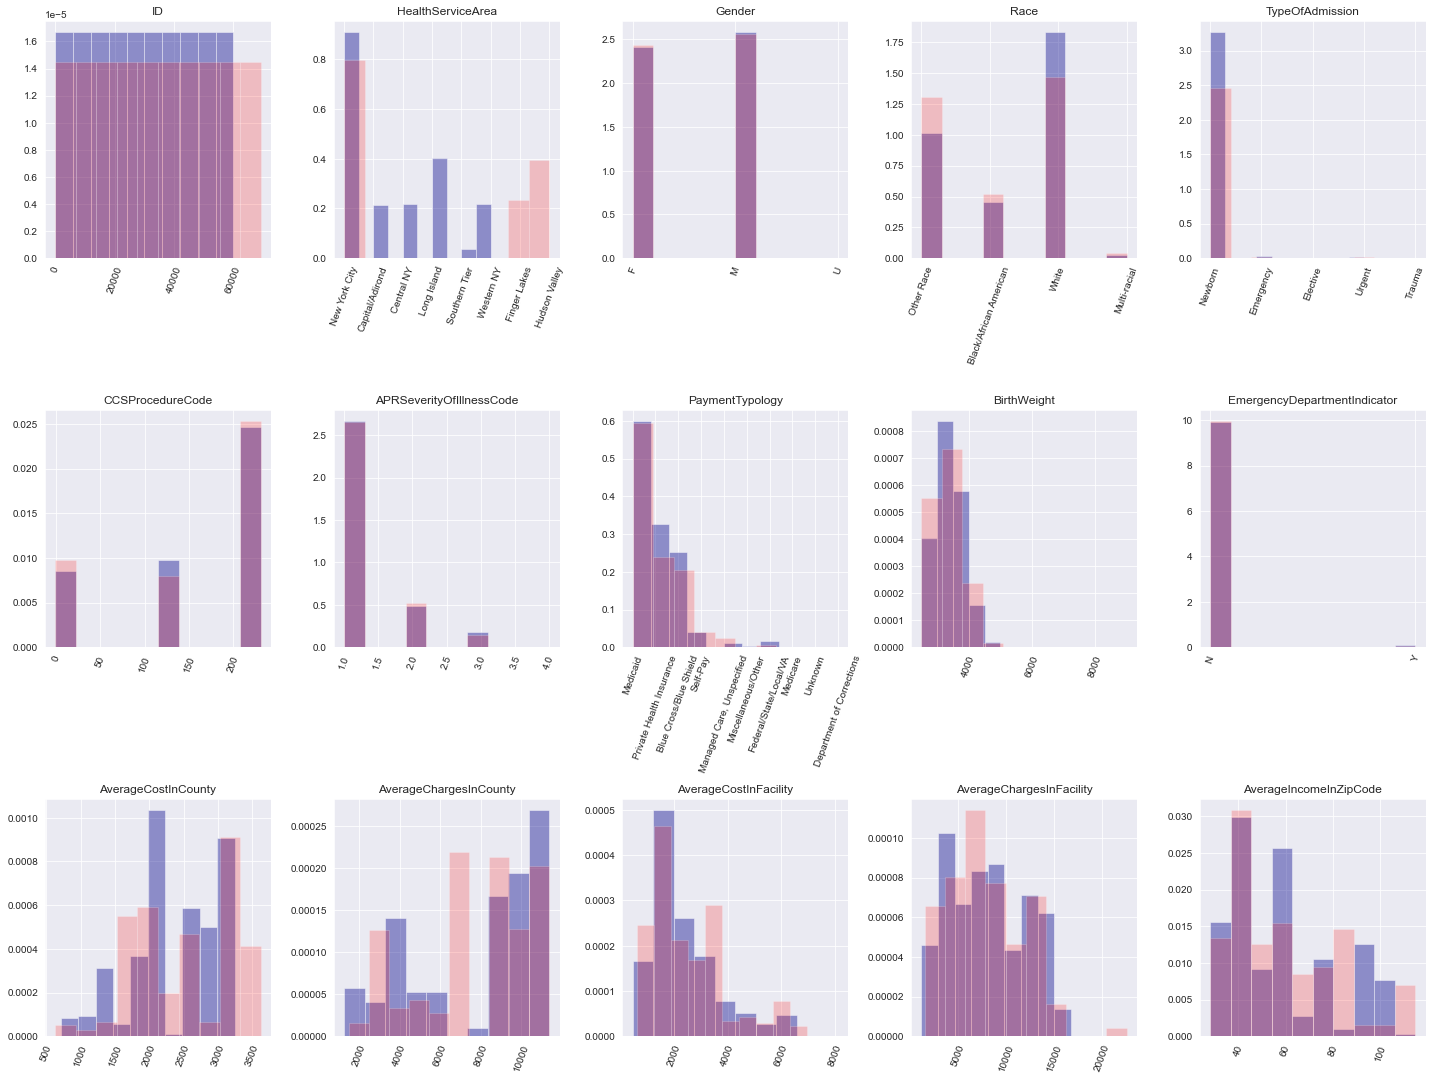

In [54]:
#Explore features of train and test set

plt.figure(figsize=(20,20))
for i, col in enumerate(test_df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(train_df[col], alpha=0.4, color='darkblue', density=True)
    plt.hist(test_df[col], alpha=0.2, color='red', density=True)
    plt.title(col)
    plt.xticks(rotation=70)
    plt.tight_layout()

Looking at the above histograms, <code> Gender, Race, TypeOfAdmissions, CCSProcedureCode, PaymentTypology</code> and <code>EmergencyDepartmentNumber</code> represent categorical variables where a patient fall under each group based on thier characteristics. <code>APRSeverityOfIllnessCode</code> on the other hand is an ordinal attribute where severity of illness ranges from 1 being minor to 4 as extreme. There are many numerical variables such as <code>Birthweight, AverageCostInCount, AverageChargesInCounty,AverageCostInFacility, AverageChargesInFacility </code> and <code>AverageIncomeInZipCode </code>that are associated with weight and cost incurred while the patient is admitteed to a hospital. The distrbution of these numeric variables are positive and skewed to the right. If we use parametric models like logistic regression, we would want to normalise the datasets to get better results without loosing key information. Also, health service areas in traning set and test set are different. We will use this group to split our data so that we have indepedent results for different areas of hospitals. 


### Target Column

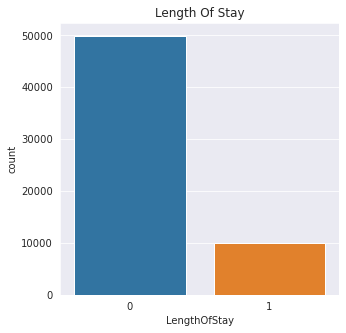

In [9]:
# Explore target column
plt.figure(figsize = (5,5))
sns.countplot(x = 'LengthOfStay',data = train_df)
plt.title('Length Of Stay')
plt.show()

The target attribute is highly imablanced with majority of patient discharged within 3 days period. A failure in choosing a appropriate evaluation metric can lead us to poor model performance. Hence, we address this issue and propose a suitable evaluation strategy in the later section of this analysis.

### Relationship between Categorical features and Target


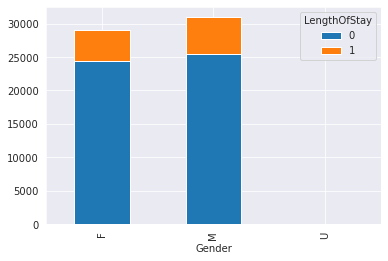

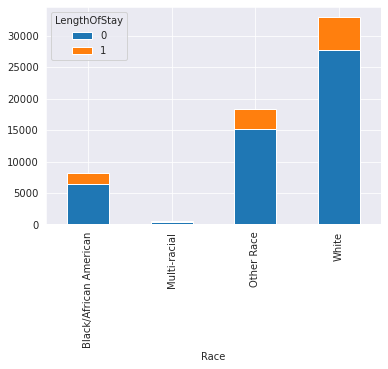

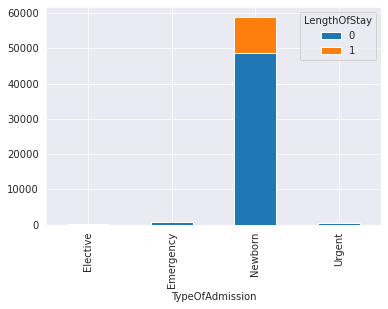

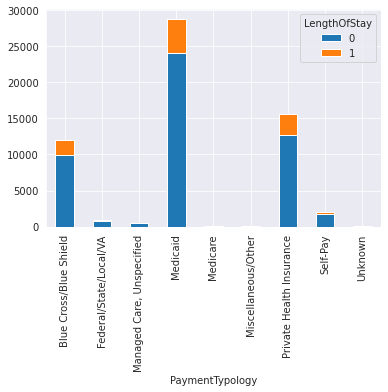

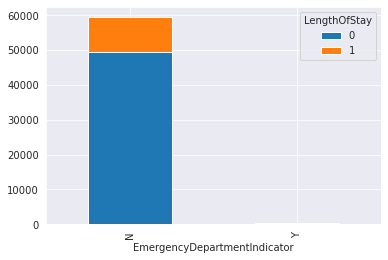

In [8]:
categorical_features = train_df.select_dtypes(include = 'object').columns
for i, col in enumerate(categorical_features):
    cross_tab = pd.crosstab(train_df[col],train_df['LengthOfStay'])
    cross_tab.plot.bar(stacked=True)

Based on the observation, majority of the patients are newborn, white and have shorter length of stay at the hosptial.There is an unknown category under <code> Gender </code> which might be a data entry error and is removed.

## Relationship between Numerical Features and Target

We hypothesized that some numerical attributes might have different range of values showing discriminative ability on our target. To validate this, we create multiple box plots for each numeric variables with the target. The difference in median values in most attributes indicates variability that can somewhat help to distinguish the length of stay in a patient, however, the graphical evidence are not significant to hold strongly onto this assumption. In addition, the range of each numerical attributes vary significantly. Features such as BirthWeight, AverageCostInCounty, and AverageCostInFacility consists of outliers that can affect model performance. After a closer look on the largest outlier point from BirthWeight, the data point seems to be an obvious value which can be handled with appropriate transformation or scaling techniques. Although it entirely depends on the types of model we choose, data pre-processing allow us to avoid noise and inconsistencies further improving the performance of a predictive model.

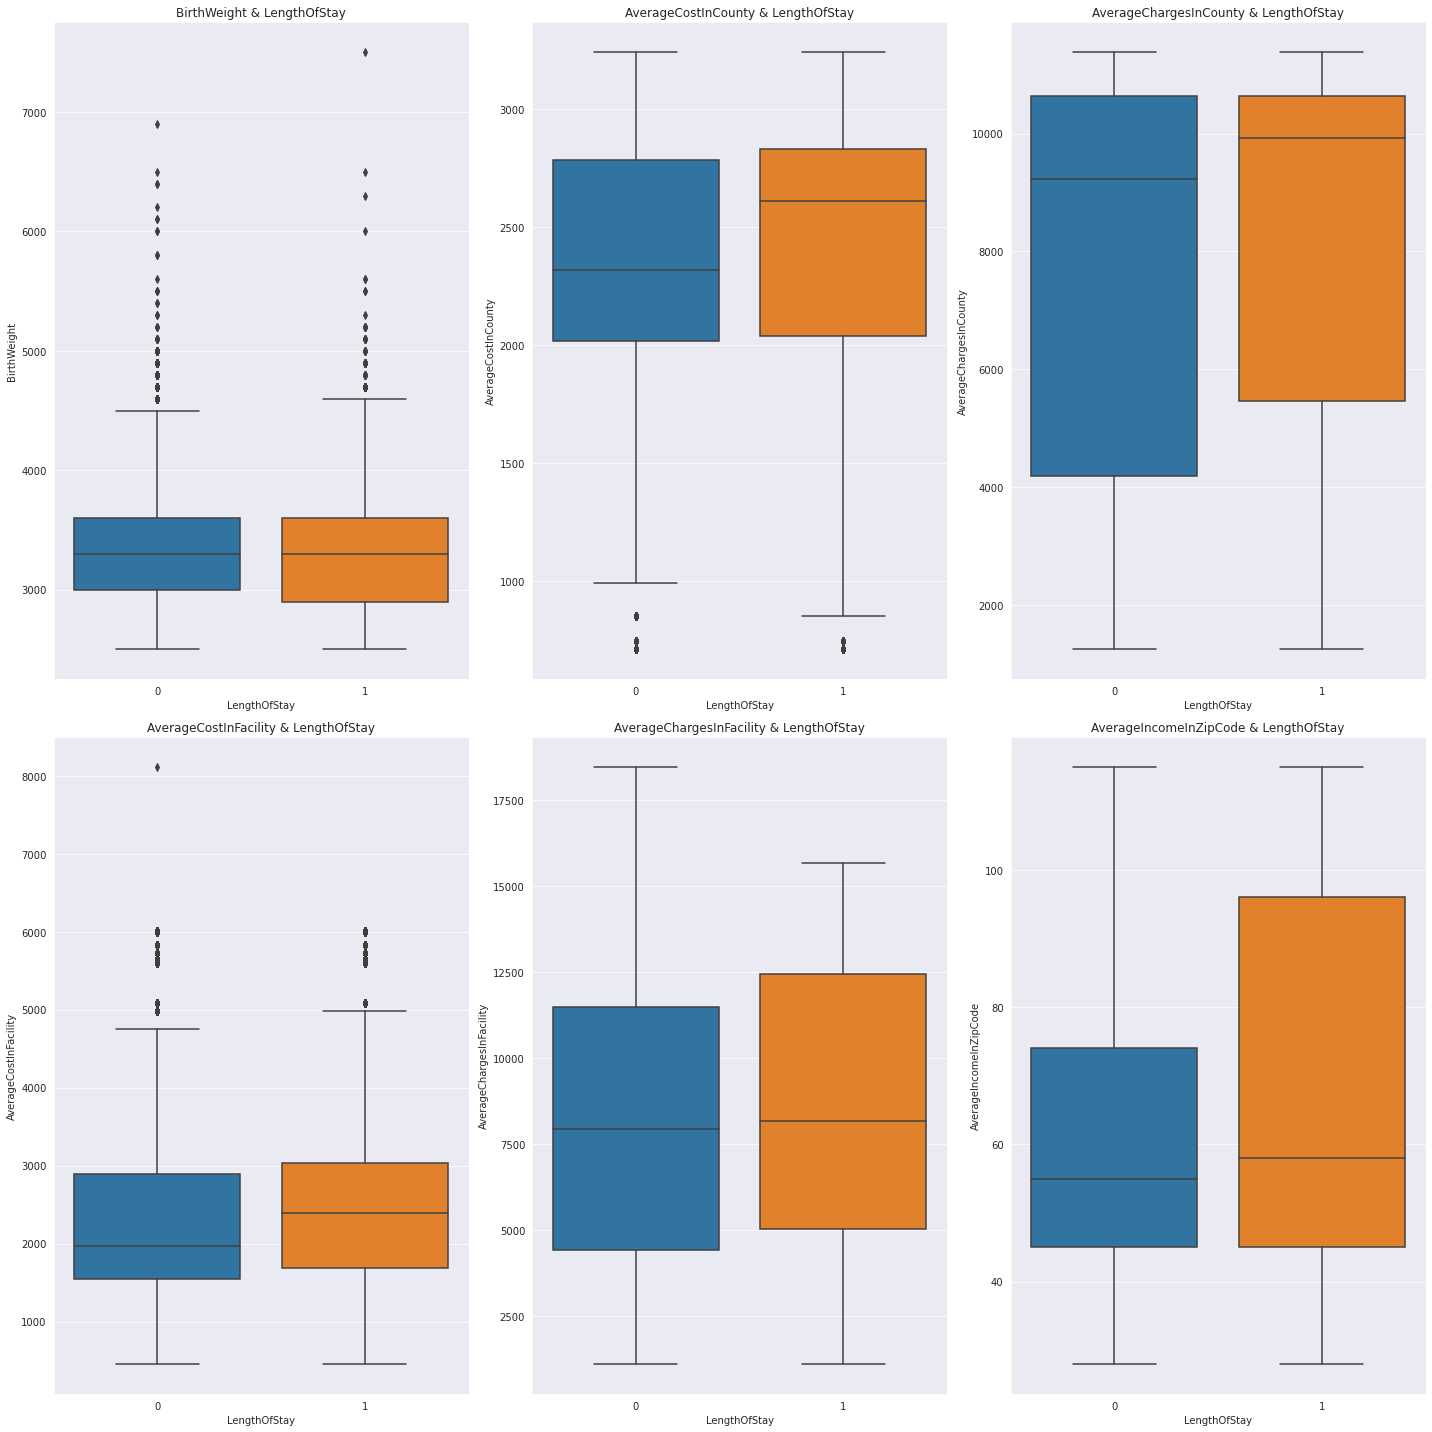

In [9]:
numerical_features = train_df.select_dtypes(exclude = 'object').columns[2:-1]
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = "LengthOfStay", y = col, data = train_df)
    plt.title(col + " & LengthOfStay")
    plt.tight_layout()

## Correlations between Features

Correlation allows us to recognise the dependencies between variables. If two features are highly correlated, the model captures all the noise leading to overfitting. Since we are expected to use all the attributes, exploring coorelation allows to us understand associations between features and their importances in classifications.


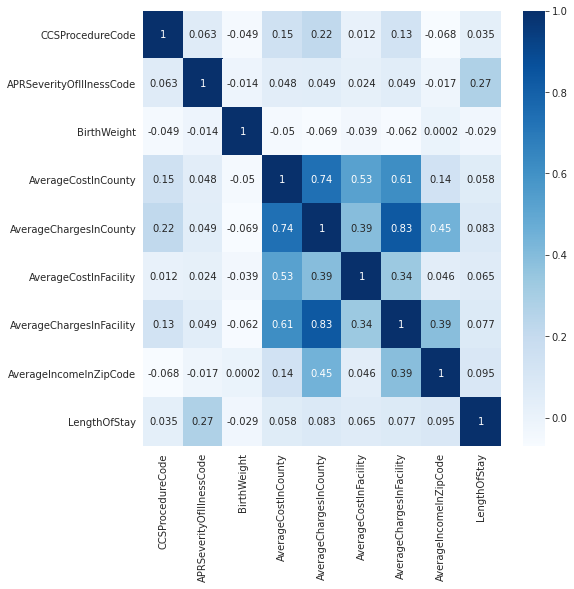

In [10]:
numeric_col = train_df.select_dtypes(exclude = 'object').columns

corr = train_df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,annot=True,cmap='Blues');

Features such as <code> AverageChargesInCounty, AverageChargesInFacility and AverageCostInCounty </code> are highy correlated. While these features represent cost of hospitalisation based on facilities and county, a new feature combining these attributes can be used in the model. However, we limit our analysis using all the attributes ignoring these associations. Further, we explore each pair of columns separated with class labels to understand thier relationships.

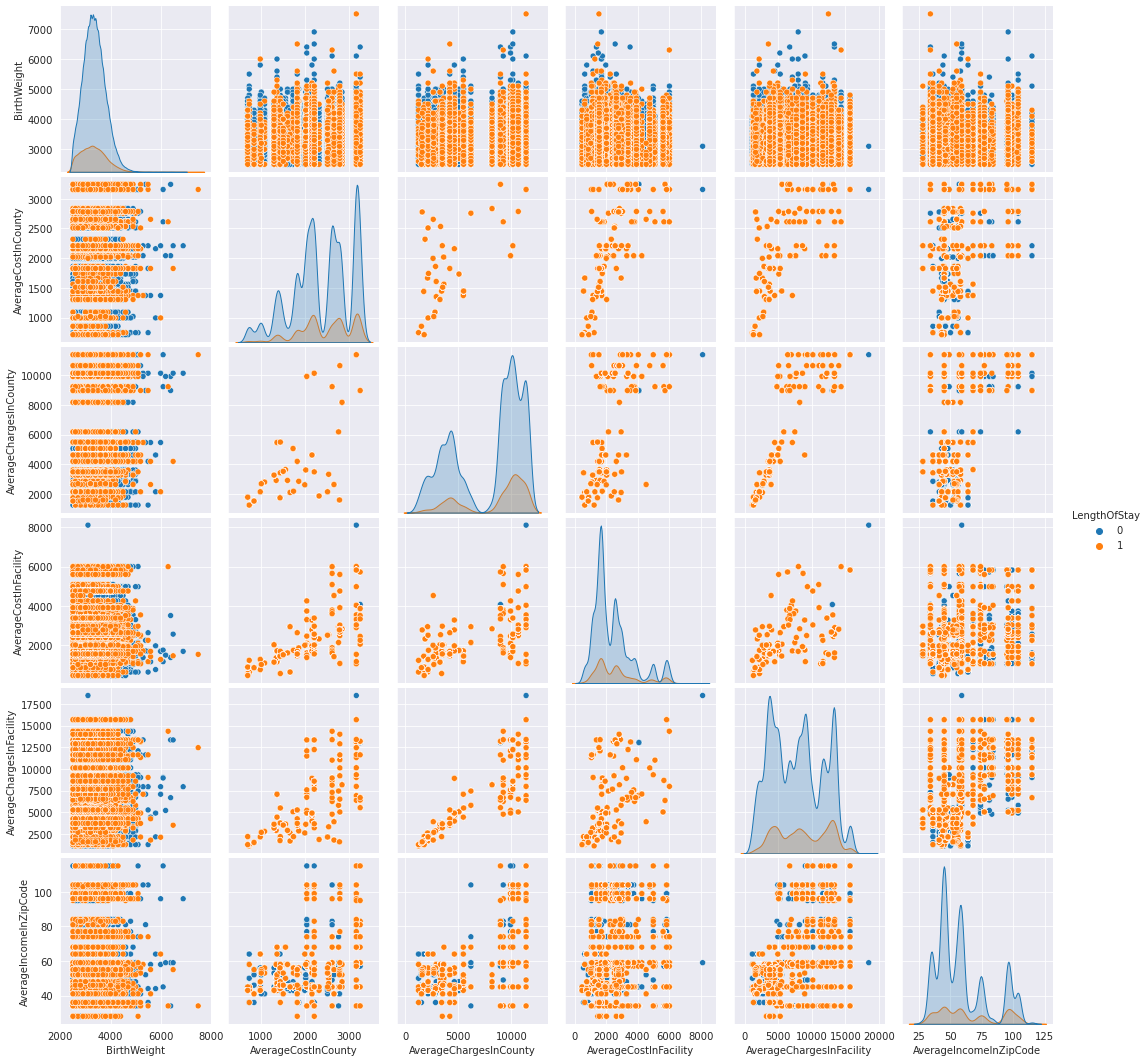

In [11]:
pair_plot_attributes = train_df[numeric_col].columns[2:]
sns.pairplot(train_df[pair_plot_attributes],hue='LengthOfStay');

## EDA Summary

From the Exploratory Data Analysis, the following observations and assumptions are made:

<ol>
    
<li> Since there are few categories within 5 nominal variables, one-hot encoding representation of these features can be used in the model building process.</li>
    <li>The pair plot shows a non-linear relationship between target and classes</li>
    <li>As our class labels are highly imbalanced, we evaluate model performance based on macro-average f1-measure treating both classes equally along with AUCROC to see how well the model predicts the probability of the class labels.</li>
    <li> We validate the performance based on Hold-Out set to avoid bias in optimisation of majority class and find optimal hyperparameters.</li>
    </ol>

## Data Preprocessing

Machine learning algorithms expects all its input value to be numbers. Therefore, it is necessary to convert all categorical attributes into numeric values using appropriate encoding technique. Here we apply one-hot encoding due to the nature of our variables being nominal and having less categories. Features such as <code> Gender, Race, Type of Admission, CCS Procedure Code, Payment Typology, EmergencyDepartment Indicator</code> are encoded using one-hot encoding technique. We ignore <code> APRSeverityOfIllnessCode</code> as it already represents a numeric interval.


In [15]:
#Convert data type of CCS Procudeure as it is a categorical variable
train_df['CCSProcedureCode'] = train_df['CCSProcedureCode'].astype('object')
test_df['CCSProcedureCode'] = test_df['CCSProcedureCode'].astype('object')

#Remove unknown from gender column
train_df = train_df.loc[train_df['Gender']!='U']
train_df['APRSeverityOfIllnessCode'] = train_df['APRSeverityOfIllnessCode'].astype(np.int64)/4.0

In [16]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncodeColumn(df, colName, drop_col, enc_onehot=None):
    if enc_onehot is None:
        enc_onehot = OneHotEncoder(handle_unknown='ignore')
        enc_onehot.fit(df[[colName]])

    onehot_ = enc_onehot.transform(df[[colName]]).toarray()

    for i in range(len(enc_onehot.categories_[0])):
        if enc_onehot.categories_[0][i] != drop_col:
            if type(enc_onehot.categories_[0][i]) == str:
                df[colName + '_' + enc_onehot.categories_[0][i]] = onehot_[:,i]
            else:
                df[colName + '_' + str(enc_onehot.categories_[0][i])] = onehot_[:,i]

    df = df.drop([colName], axis=1)

    return df, enc_onehot

from sklearn import preprocessing

def minMaxScale(df, colName, min_max_scaler=None):
    if min_max_scaler is None: 
        min_max_scaler = preprocessing.MinMaxScaler()
        min_max_scaler.fit(df[[colName]])

    df[colName] = min_max_scaler.transform(df[[colName]])
    return df, min_max_scaler


def robustScale(df, colName, min_max_scaler=None):
    if min_max_scaler is None: 
        min_max_scaler = preprocessing.RobustScaler()
        min_max_scaler.fit(df[[colName]])

    df[colName] = min_max_scaler.transform(df[[colName]])
    return df, min_max_scaler

In [17]:
train_df, gender_enc = oneHotEncodeColumn(train_df, 'Gender', 'U')
train_df, race_enc = oneHotEncodeColumn(train_df, 'Race', 'Other Race')
train_df, ToA_enc = oneHotEncodeColumn(train_df, 'TypeOfAdmission', 'Newborn')
train_df, CCSPC_enc = oneHotEncodeColumn(train_df, 'CCSProcedureCode', -1)
train_df, paymentTop_enc = oneHotEncodeColumn(train_df, 'PaymentTypology', 'Miscellaneous/Other')
train_df, Egcy_enc = oneHotEncodeColumn(train_df, 'EmergencyDepartmentIndicator', 'N')

## Data Modeling

For this binary classification problem, we compared Logistic Regression, Decision-Trees,Random Forest and AdaBoost Classifer. For evaluation purpose, we used the macro-average f1-score and AUC-ROC curve based on these assumptions.
First, if we used only Precision, we would attempt to improve the performance of identifying only the patient who will stay longer than 3 days. This increases the risk of readmission as it would discharge patients that might need to stay longer (False Positives) which is one of the major cost drivers in healthcare. Second, if we used only recall, the model would be able to identify more patients who require special care however, would increase the length of stay of healthy patients. This is another financial burden for hospitals and patients. As valuing both the objective, we used macro-average f1-score to maintain a trade-off between precision and recall treating both classed equally and irrespective of their proportions. Also, we used Area under the receiver operating characteristics curve (AUC ROC) to evaluate how well the model predicts the likelihood of each class label.


In [19]:
data_trainSplit = train_df[(train_df['HealthServiceArea'] == 'New York City') 
                             | (train_df['HealthServiceArea'] == 'Southern Tier') ]
data_valSplit = train_df[(train_df['HealthServiceArea'] == 'Long Island') 
                           | (train_df['HealthServiceArea'] == 'Central NY') ]
data_testSplit = train_df[(train_df['HealthServiceArea'] == 'Capital/Adirond') 
                            | (train_df['HealthServiceArea'] == 'Western NY') ]

In [20]:
cols2scale = ['AverageCostInCounty','AverageChargesInCounty',
              'AverageCostInFacility','AverageChargesInFacility',
              'AverageIncomeInZipCode', 'BirthWeight']

minmax_scaler_hold = dict()

for col in cols2scale:
    data_trainSplit, minmax_scaler_hold[col] =  minMaxScale(data_trainSplit, col)
    data_valSplit, _ =  minMaxScale(data_valSplit, col, minmax_scaler_hold[col])
    data_testSplit, _ =  minMaxScale(data_testSplit, col, minmax_scaler_hold[col])

In [33]:
X_val = data_valSplit.drop(['LengthOfStay', 'HealthServiceArea', 'ID'], axis=1) #remove data leakage features
y_val = (data_valSplit[['LengthOfStay']]>3).astype(np.int64)

X_train = data_trainSplit.drop(['LengthOfStay', 'HealthServiceArea', 'ID'], axis=1) #remove data leakage features
y_train = (data_trainSplit[['LengthOfStay']]>3).astype(np.int64)

X_test = data_testSplit.drop(['LengthOfStay', 'HealthServiceArea', 'ID'], axis=1) #remove data leakage features
y_test = (data_testSplit[['LengthOfStay']]>3).astype(np.int64)

In [34]:
print("Train data size: ", y_train.shape[0])
print("Val data size: ", y_val.shape[0])
print("Test data size: ", y_test.shape[0])

Train data size:  28294
Val data size:  18681
Test data size:  12990


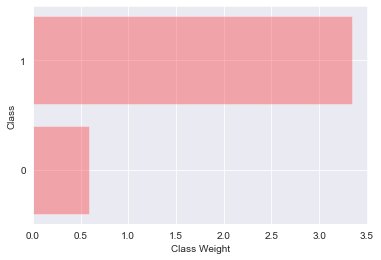

In [35]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(y_train), np.ravel(y_train.to_numpy()))
class_weights = dict(zip(np.unique(y_train), class_weights))

plt.barh([str(i) for i in class_weights], [class_weights[i] for i in class_weights], alpha=0.3, color='r')
plt.xlabel('Class Weight')
plt.ylabel('Class')
plt.show()

In [36]:
from sklearn.metrics import log_loss


def get_sample_weights(y, class_weights):
    sample_weight = np.ravel(y)*class_weights[1] + (1 - np.ravel(y))*class_weights[0]
    return sample_weight


def fit_classification_model(clf, xtrain, ytrain, xval, yval, class_weights={0: 1, 1: 1}, sample_weights=None, print_report=False):
    clf.fit(xtrain, np.ravel(ytrain), sample_weight=sample_weights)
    ytrain_pred = clf.predict(xtrain)
    yval_pred = clf.predict(xval)
    
    f1_val = f1_score(yval, yval_pred, average='macro')
    f1_train = f1_score(ytrain, ytrain_pred, average='macro')
    
    bce_val = log_loss(yval, yval_pred, sample_weight=get_sample_weights(yval, class_weights))
    bce_train = log_loss(ytrain, ytrain_pred, sample_weight=get_sample_weights(ytrain, class_weights))
    
    if print_report:
        print(classification_report(yval, yval_pred))
        
    return clf, f1_train, f1_val, bce_train, bce_val



def test_classification_model(clf, xval, yval, print_report=False):
    yval_pred = clf.predict(xval)
    
    rec_val = recall_score(yval, yval_pred, average='macro')
    
    if print_report:
        print(classification_report(yval, yval_pred))
        print(rec_val)
        
    return clf, rec_val, bce_val

### Linear Classifier


              precision    recall  f1-score   support

           0       0.85      0.86      0.85     14820
           1       0.44      0.43      0.43      3861

    accuracy                           0.77     18681
   macro avg       0.64      0.64      0.64     18681
weighted avg       0.77      0.77      0.77     18681

Train set F1-Score: 0.6002 BCE: 11.9330
Valid set F1-Score: 0.6438 BCE: 13.7584


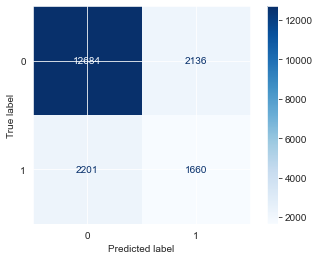

In [40]:
Results = dict()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(class_weight='balanced',max_iter=500)

clf, rec_train, rec_val, bce_train, bce_val = fit_classification_model(clf, X_train, y_train, X_val, y_val, class_weights=class_weights, print_report=True)

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

Results['balanced_linear'] = {'clf': clf, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

plot_confusion_matrix(clf, X_val, y_val, cmap = "Blues")  
plt.show()

<b>Observation:</b> The model was only able to classify label 0. This is due to high imbalances in the target labels.

In [41]:
Cs = np.logspace(-2,2,num=10)

val_performace = list()
train_performace = list()
for C in Cs:
    clf = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', penalty='l1', C=C)
    clf, rec_train, rec_val, bce_train, bce_val = fit_classification_model(clf, X_train, y_train, X_val, y_val, class_weights=class_weights)
    
    val_performace.append(bce_val)
    train_performace.append(bce_train)
    print(f'Done .. C = {C:.5f} Train F1 = {rec_train:.3f}, Val F1 = {rec_val:.3f}')

Done .. C = 0.01000 Train F1 = 0.602, Val F1 = 0.622
Done .. C = 0.02783 Train F1 = 0.599, Val F1 = 0.638
Done .. C = 0.07743 Train F1 = 0.601, Val F1 = 0.644
Done .. C = 0.21544 Train F1 = 0.600, Val F1 = 0.644
Done .. C = 0.59948 Train F1 = 0.600, Val F1 = 0.644
Done .. C = 1.66810 Train F1 = 0.600, Val F1 = 0.644
Done .. C = 4.64159 Train F1 = 0.600, Val F1 = 0.643
Done .. C = 12.91550 Train F1 = 0.600, Val F1 = 0.643
Done .. C = 35.93814 Train F1 = 0.600, Val F1 = 0.643
Done .. C = 100.00000 Train F1 = 0.600, Val F1 = 0.643


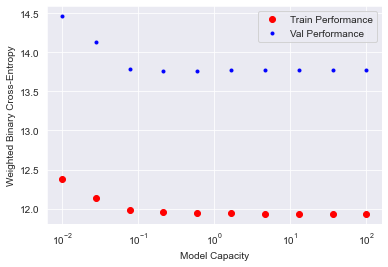

In [42]:
plt.plot(Cs, train_performace, 'ro')
plt.plot(Cs, val_performace, 'b.')
plt.xscale('log')
plt.legend(['Train Performance','Val Performance'])
plt.xlabel('Model Capacity')
plt.ylabel('Weighted Binary Cross-Entropy')
plt.show()

Train set F1-Score: 0.6006 BCE: 11.9828
Valid set F1-Score: 0.6441 BCE: 13.7827


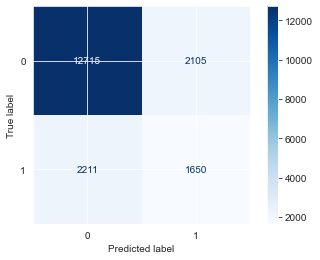

In [44]:
clf = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', penalty='l1', C=0.07743)

clf, rec_train, rec_val, bce_train, bce_val = fit_classification_model(clf, X_train, y_train, X_val, y_val, class_weights=class_weights)

Results['balanced_linear_lasso'] = {'clf': clf, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(clf, X_val, y_val, cmap = "Blues")  
plt.show()

### Non-Linear Classifier

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(2)
poly2.fit(X_train)
X_train_poly2 = poly2.transform(X_train)
X_val_poly2 = poly2.transform(X_val)

In [46]:
Cs = np.logspace(-2,2,num=10)

val_performace = list()
train_performace = list()
for C in Cs:
    clf = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', penalty='l1', C=C)
    clf, rec_train, rec_val, bce_train, bce_val = fit_classification_model(clf, X_train_poly2, y_train, X_val_poly2, y_val, class_weights=class_weights)
    
    val_performace.append(bce_val)
    train_performace.append(bce_train)
    print(f'Done .. C = {C:.5f} Train F1 = {rec_train:.3f}, Val F1 = {rec_val:.3f}')

Done .. C = 0.01000 Train F1 = 0.600, Val F1 = 0.637
Done .. C = 0.02783 Train F1 = 0.607, Val F1 = 0.642
Done .. C = 0.07743 Train F1 = 0.611, Val F1 = 0.640
Done .. C = 0.21544 Train F1 = 0.617, Val F1 = 0.638
Done .. C = 0.59948 Train F1 = 0.617, Val F1 = 0.629
Done .. C = 1.66810 Train F1 = 0.619, Val F1 = 0.618
Done .. C = 4.64159 Train F1 = 0.620, Val F1 = 0.615
Done .. C = 12.91550 Train F1 = 0.620, Val F1 = 0.613
Done .. C = 35.93814 Train F1 = 0.620, Val F1 = 0.613
Done .. C = 100.00000 Train F1 = 0.620, Val F1 = 0.613


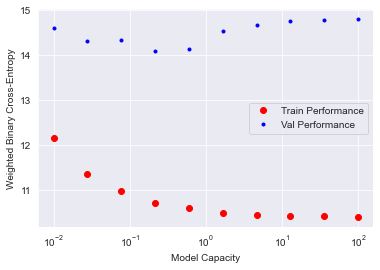

In [47]:
plt.plot(Cs, train_performace, 'ro')
plt.plot(Cs, val_performace, 'b.')
plt.xscale('log')
plt.legend(['Train Performance','Val Performance'])
plt.xlabel('Model Capacity')
plt.ylabel('Weighted Binary Cross-Entropy')
plt.show()

Train set F1-Score: 0.6108 BCE: 10.9761
Valid set F1-Score: 0.6400 BCE: 14.3322


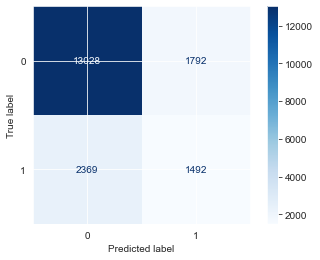

In [49]:
clf = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', penalty='l1', C=0.07743)
clf, rec_train, rec_val, bce_train, bce_val = fit_classification_model(clf, X_train_poly2, y_train, X_val_poly2, y_val, class_weights=class_weights)

Results['balanced_poly2_lasso'] = {'clf': clf, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(clf, X_val_poly2, y_val,cmap = "Blues")  
plt.show()

### Decision Tree Classifier

Train set F1-Score: 0.8173 BCE: 2.4649
Valid set F1-Score: 0.5686 BCE: 16.9846


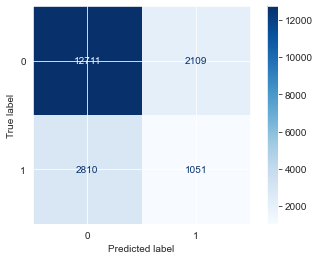

In [58]:
tree = DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced',random_state=42)

tree, rec_train, rec_val, bce_train, bce_val = fit_classification_model(tree, X_train, y_train, X_val, y_val, class_weights=class_weights, sample_weights=get_sample_weights(y_train, class_weights))

Results['decision-tree'] = {'clf': tree, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(tree, X_val, y_val,cmap = "Blues")  
plt.show()

### Random Forest Classifier

Train set F1-Score: 0.7409 BCE: 7.1310
Valid set F1-Score: 0.5878 BCE: 17.2152


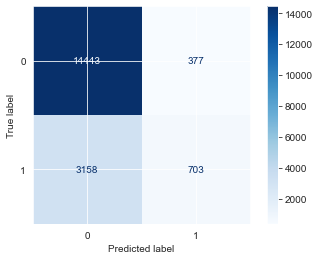

In [66]:
forest = RandomForestClassifier(n_estimators=500, min_samples_split = 2, min_samples_leaf = 2, max_depth = 15 ,random_state = 42)

forest, rec_train, rec_val, bce_train, bce_val = fit_classification_model(forest, X_train, y_train, X_val, y_val, class_weights=class_weights, sample_weights=get_sample_weights(y_train, class_weights))

Results['random-forest'] = {'clf': forest, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(forest, X_val, y_val,cmap = "Blues")  
plt.show()

### AdaBoost Classifier

Train set F1-Score: 0.6078 BCE: 12.5756
Valid set F1-Score: 0.6228 BCE: 14.6361


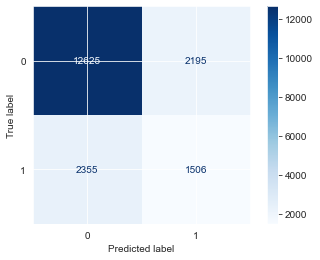

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,learning_rate= 0.01)
ada, rec_train, rec_val, bce_train, bce_val = fit_classification_model(ada, X_train, y_train, X_val, y_val, class_weights=class_weights, sample_weights=get_sample_weights(y_train, class_weights))

Results['adaBoost'] = {'clf': ada, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(ada, X_val, y_val, cmap = "Blues")  
plt.show()

In [76]:
learning_rates = np.linspace(0.000001,0.001,5)

val_performace = list()
train_performace = list()

for lr in learning_rates:
    ada = AdaBoostClassifier(n_estimators=200,learning_rate= lr)
    ada, rec_train, rec_val, bce_train, bce_val = fit_classification_model(ada, X_train, y_train, X_val, y_val, class_weights=class_weights)
    val_performace.append(bce_val)
    train_performace.append(bce_train)
    print(f'Done .. C = {lr:.5f} Train F1 = {rec_train:.3f}, Val F1 = {rec_val:.3f}')

Done .. C = 0.00000 Train F1 = 0.603, Val F1 = 0.589
Done .. C = 0.00025 Train F1 = 0.603, Val F1 = 0.589
Done .. C = 0.00050 Train F1 = 0.603, Val F1 = 0.589
Done .. C = 0.00075 Train F1 = 0.460, Val F1 = 0.442
Done .. C = 0.00100 Train F1 = 0.460, Val F1 = 0.442


Train set F1-Score: 0.6078 BCE: 12.5756
Valid set F1-Score: 0.6228 BCE: 14.6361


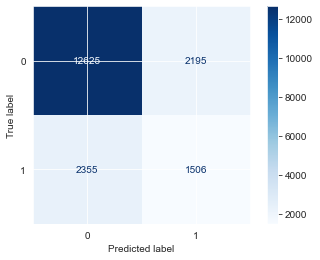

In [77]:
ada = AdaBoostClassifier(n_estimators=200,learning_rate= 0.00025)

ada, rec_train, rec_val, bce_train, bce_val = fit_classification_model(ada, X_train, y_train, X_val, y_val, class_weights=class_weights, sample_weights=get_sample_weights(y_train, class_weights))

Results['adaBoost'] = {'clf': ada, 'rec_train': rec_train, 'rec_val': rec_val, 'bce_train':bce_train, 'bce_val': bce_val}

print(f'Train set F1-Score: {rec_train:.4f} BCE: {bce_train:.4f}')
print(f'Valid set F1-Score: {rec_val:.4f} BCE: {bce_val:.4f}')

plot_confusion_matrix(ada, X_val, y_val, cmap = "Blues")  
plt.show()

In [83]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Train F1', 'Train BCE', 'Val F1', 'Val BCE'])

for i in Results:
    rec_train = Results[i]['rec_train']
    rec_val = Results[i]['rec_val']
    bce_train = Results[i]['bce_train']
    bce_val = Results[i]['bce_val']
    t.add_row([i, f'{rec_train:.3f}',f'{bce_train:.3f}', f'{rec_val:.3f}', f'{bce_val:.3f}'])

print(t)

+-----------------------+----------+-----------+--------+---------+
|         Model         | Train F1 | Train BCE | Val F1 | Val BCE |
+-----------------------+----------+-----------+--------+---------+
|    balanced_linear    |  0.600   |   11.933  | 0.644  |  13.758 |
| balanced_linear_lasso |  0.601   |   11.983  | 0.644  |  13.783 |
|  balanced_poly2_lasso |  0.611   |   10.976  | 0.640  |  14.332 |
|        adaBoost       |  0.608   |   12.576  | 0.623  |  14.636 |
|     decision-tree     |  0.817   |   2.465   | 0.569  |  16.985 |
|     random-forest     |  0.741   |   7.131   | 0.588  |  17.215 |
+-----------------------+----------+-----------+--------+---------+


In [85]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(clf, X_val, y_val):
    r = permutation_importance(clf, X_val, y_val,n_repeats=30)
    inx = np.argsort(r.importances_mean)
    
    plt.barh(X_val.columns[inx], r.importances_mean[inx])
    plt.xticks(rotation='vertical')

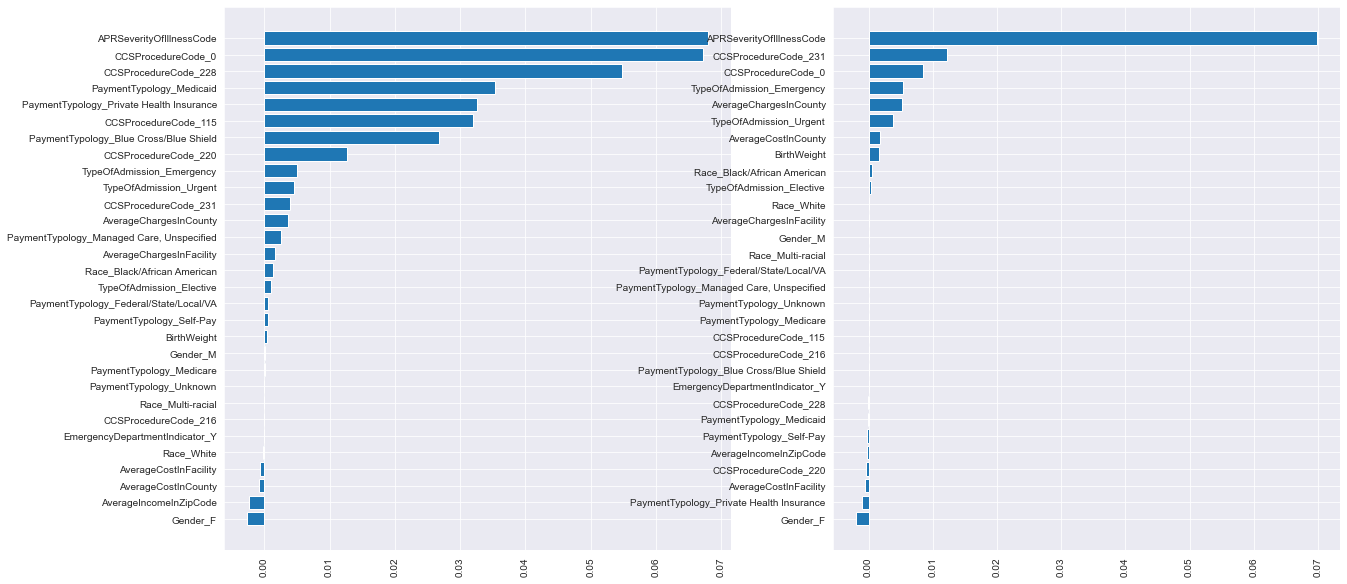

In [86]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plot_permutation_importance(Results['balanced_linear']['clf'], X_val, y_val)
plt.subplot(1,2,2)
plot_permutation_importance(Results['balanced_linear_lasso']['clf'], X_val, y_val)

plt.show()

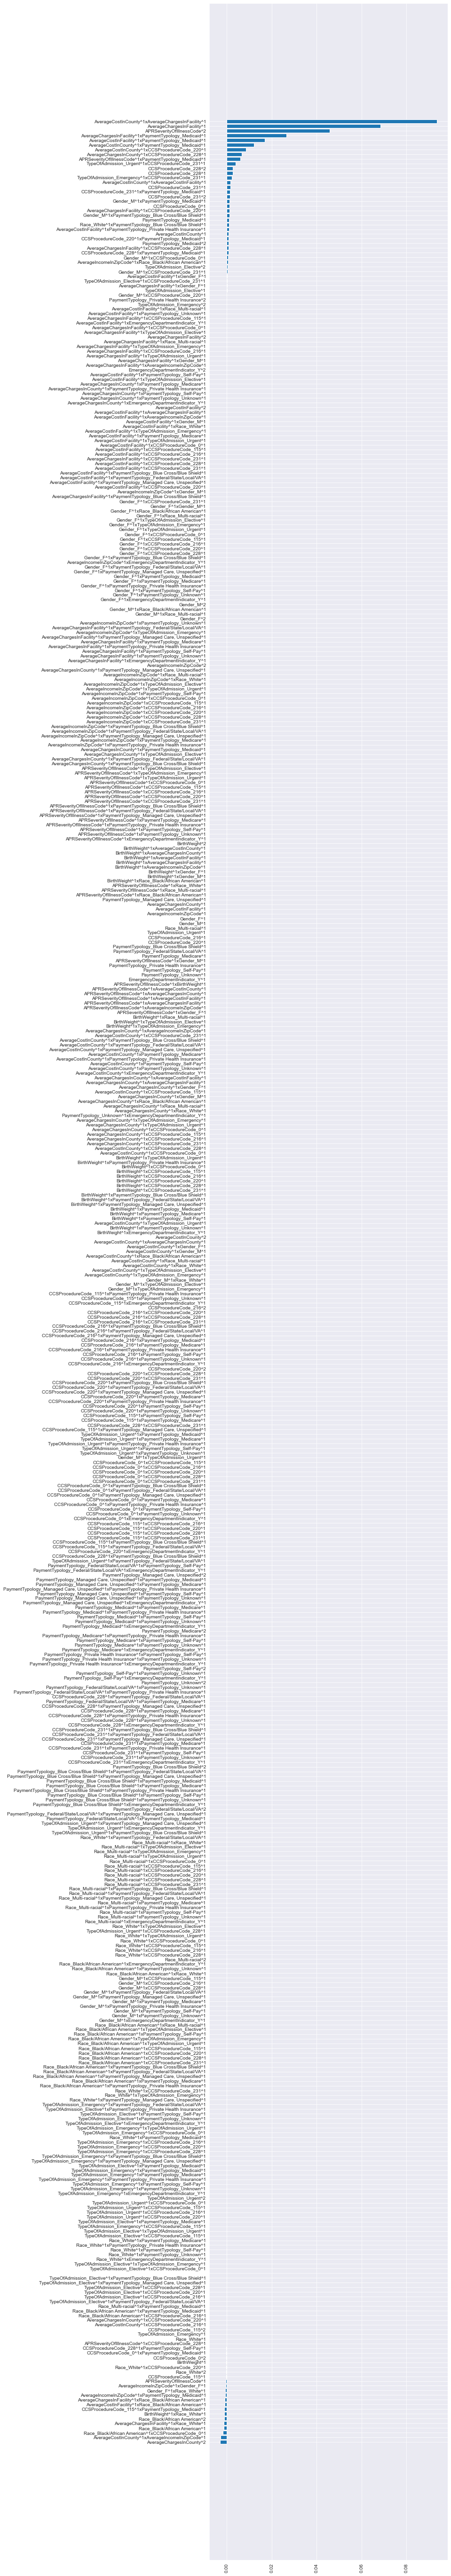

In [87]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X_train.columns,p) for p in poly2.powers_]]
X_val_poly2_df = pd.DataFrame(X_val_poly2, columns = target_feature_names)

plt.figure(figsize=(20,100))
plt.subplot(1,2,1)
plot_permutation_importance(Results['balanced_poly2_lasso']['clf'], X_val_poly2_df, y_val)

#### Ultimate Judgement

While performance of linear and non-linear models are similar, we select balanced_poly2_lasso based on non-linear relationship in the features are target. We now use this model to predict on unseen data and finally on our test set.

# Analysis of the final model

Here we ask questions about the model we selected and see if it agrees with our view of the problem and our values.

## Biases
How does the model perfrom for different health service areas?

Test set F1 Score:  0.5856651171877244


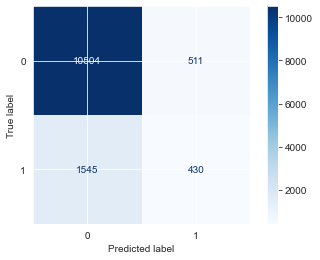

In [92]:
X_test_poly2 = poly2.transform(X_test)
_, f1_test, _ = test_classification_model(Results['balanced_poly2_lasso']['clf'], X_test_poly2, y_test)

print('Test set F1 Score: ', f1_test)
plot_confusion_matrix(Results['balanced_poly2_lasso']['clf'],X_test_poly2, y_test,cmap='Blues');

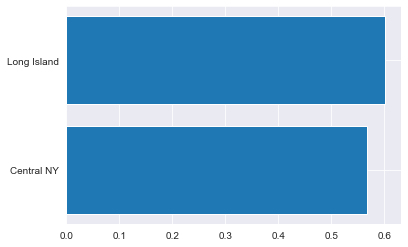

In [93]:
rechold = list()
for hsa in data_testSplit['HealthServiceArea'].unique():
    X_test_hsa = X_test_poly2[data_testSplit['HealthServiceArea'] == hsa]
    y_test_hsa = y_test[data_testSplit['HealthServiceArea'] == hsa]
    _, rec_test, _ = test_classification_model(Results['balanced_poly2_lasso']['clf'], X_test_hsa, y_test_hsa)
    rechold.append(rec_test)

plt.barh(data_valSplit['HealthServiceArea'].unique(), rechold)
plt.show()

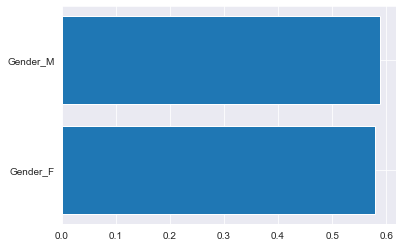

In [94]:
#How does the models perform for different races? is there a difference?
gender = ['Gender_F', 'Gender_M']

rechold = list()
for hsa in gender:
    X_test_hsa = X_test_poly2[data_testSplit[hsa] == 1]
    y_test_hsa = y_test[data_testSplit[hsa] == 1]
    _, rec_test, _ = test_classification_model(Results['balanced_poly2_lasso']['clf'], X_test_hsa, y_test_hsa)
    rechold.append(rec_test)

plt.barh(gender, rechold)
plt.show()

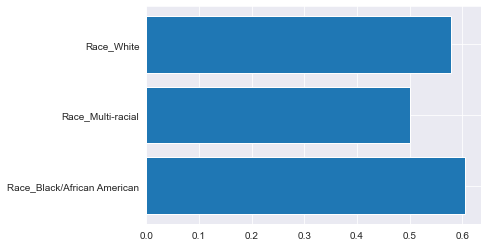

In [95]:
#What about race?

race = ['Race_Black/African American', 'Race_Multi-racial', 'Race_White']

rechold = list()
for hsa in race:
    X_test_hsa = X_test_poly2[data_testSplit[hsa] == 1]
    y_test_hsa = y_test[data_testSplit[hsa] == 1]
    _, rec_test, _ = test_classification_model(Results['balanced_poly2_lasso']['clf'], X_test_hsa, y_test_hsa)
    rechold.append(rec_test)

plt.barh(race, rechold)
plt.show()

### Prediction in Test Data

In [96]:
data_test = test_df.copy()

for i, col in enumerate(data_test.columns):
    if data_test[col].dtypes != np.int64:
        data_test[col] = data_test[col].astype('category')

data_test['APRSeverityOfIllnessCode'] = data_test['APRSeverityOfIllnessCode'].astype('category')
data_test['CCSProcedureCode'] = data_test['CCSProcedureCode'].astype('category')

In [97]:
data_test, _ = oneHotEncodeColumn(data_test, 'Gender', 'U', gender_enc)
data_test, _ = oneHotEncodeColumn(data_test, 'Race', 'Other Race', race_enc)
data_test, _ = oneHotEncodeColumn(data_test, 'TypeOfAdmission', 'Newborn', ToA_enc)
data_test, _ = oneHotEncodeColumn(data_test, 'CCSProcedureCode', -1, CCSPC_enc)
data_test, _ = oneHotEncodeColumn(data_test, 'PaymentTypology', 'Miscellaneous/Other', paymentTop_enc)
data_test, _ = oneHotEncodeColumn(data_test, 'EmergencyDepartmentIndicator', 'N', Egcy_enc)

data_test['APRSeverityOfIllnessCode'] = data_test['APRSeverityOfIllnessCode'].astype(np.int64)/4.0

cols2scale = ['AverageCostInCounty','AverageChargesInCounty',
              'AverageCostInFacility','AverageChargesInFacility',
              'AverageIncomeInZipCode', 'BirthWeight']

for col in cols2scale:
    data_test, _ =  minMaxScale(data_test, col, minmax_scaler_hold[col])

In [98]:
X_test = data_test.drop(['HealthServiceArea', 'ID'], axis=1) #remove data leakage features
X_test_poly2 = poly2.transform(X_test)
clf = Results['balanced_poly2_lasso']['clf']
data_test['LengthOfStay'] =clf.predict(X_test_poly2)
data_test = data_test[['ID','LengthOfStay']]

In [99]:
data_test.to_csv('predictions.csv', index=False)

## Conclusion and Future Improvements

Overall, Polynomial Logistic Regression with a lasso penalty performed comparatively better than other classifers. We limit our analysis on machine learning algorithsm to have better explainability on how the models work and what features are important indicator for determining length of stay. Based on the results, our model is fair for all gender, race and hospital areas. This analysis could be extended as per requirement such as predicting more number of longer hospitals. However, this depends entirely on the business problem.
